In [1]:
import h5py
import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model 
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image

In [2]:
IMAGE_SIZE = [224, 224]                                                               #specifying the image size
train_path = 'C:/Users/divya/Desktop/fake_note_project/data/training'                 #assigning the training set path
valid_path = 'C:/Users/divya/Desktop/fake_note_project/data/test'                     #assigning the testing set path



                                                                                      #vgg16

vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False,classes=7)  

for layer in vgg.layers:
  layer.trainable = False

folders = glob('C:/Users/divya/Desktop/fake_note_project/data/training/*')            #to include the folders in training set

x = Flatten()(vgg.output)                                                             #flatenning the layer

prediction = Dense(len(folders),activation='softmax')(x)                              

model = Model(inputs=vgg.input,outputs=prediction)                                    #creating a model

#model.summary()

model.compile(                                                                        #compiling the model
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
) 






from keras.preprocessing.image import ImageDataGenerator                             #creating objects for ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('C:/Users/divya/Desktop/fake_note_project/data/training',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 classes=['10','100','20','200','2000','50','500'],
                                                 class_mode='categorical')
test_set = train_datagen.flow_from_directory('C:/Users/divya/Desktop/fake_note_project/data/test',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 classes=['10','100','20','200','2000','50','500'],
                                                 class_mode='categorical'
                                                 )




Found 169 images belonging to 7 classes.
Found 174 images belonging to 7 classes.


In [3]:
checkpoint_path="C:/Users/divya/Desktop/fake_note_project/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

Epoch 1/15
6/6 [==============================] - ETA: 0s - loss: 2.7381 - accuracy: 0.1734
Epoch 00001: saving model to C:/Users/divya/Desktop/fake_note_project\cp.ckpt
6/6 [==============================] - 117s 20s/step - loss: 2.7381 - accuracy: 0.1734 - val_loss: 1.8495 - val_accuracy: 0.2471
Epoch 2/15
6/6 [==============================] - ETA: 0s - loss: 1.5629 - accuracy: 0.4451
Epoch 00002: saving model to C:/Users/divya/Desktop/fake_note_project\cp.ckpt
6/6 [==============================] - 107s 18s/step - loss: 1.5629 - accuracy: 0.4451 - val_loss: 1.4361 - val_accuracy: 0.6264
Epoch 3/15
6/6 [==============================] - ETA: 0s - loss: 1.2097 - accuracy: 0.6590
Epoch 00003: saving model to C:/Users/divya/Desktop/fake_note_project\cp.ckpt
6/6 [==============================] - 107s 18s/step - loss: 1.2097 - accuracy: 0.6590 - val_loss: 0.7410 - val_accuracy: 0.7701
Epoch 4/15
6/6 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.7572
Epoch 00004

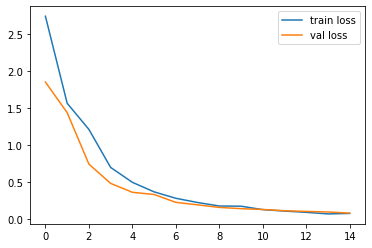

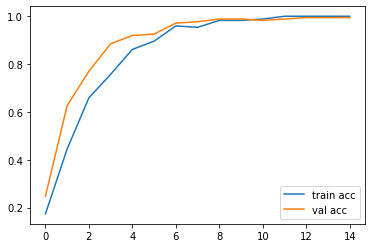

<Figure size 432x288 with 0 Axes>

In [56]:
def classifying():
   r = model.fit(                                                                    #training the model   
       training_set,
        validation_data=test_set,
        epochs=15,
        steps_per_epoch=len(training_set),
        validation_steps=len(test_set),
        callbacks = [cp_callback])
   plt.plot(r.history['loss'],label='train loss')                                    
   plt.plot(r.history['val_loss'],label='val loss')
   plt.legend()
   plt.show()
   plt.savefig('Lossval_loss')

   plt.plot(r.history['accuracy'],label='train acc')
   plt.plot(r.history['val_accuracy'],label='val acc')
   plt.legend()
   plt.show()
   plt.savefig('AccVal_acc')
#classifying()

In [4]:
latest=tf.train.latest_checkpoint(checkpoint_dir)
latest

In [7]:
from keras.preprocessing import image
train_generator=train_datagen.flow_from_directory(
        directory=r"C:/Users/divya/Desktop/fake_note_project/data/training",
        target_size=(224,224),
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
    )

test_generator=test_datagen.flow_from_directory(
        directory=r"C:/Users/divya/Desktop/fake_note_project/data/test",
        target_size=(224,224),
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
    )
model.load_weights(latest)

Found 169 images belonging to 7 classes.
Found 174 images belonging to 7 classes.
Found 169 images belonging to 7 classes.
Found 174 images belonging to 7 classes.


In [8]:
def pred(file_path):
    img1 = image.load_img(file_path,target_size=(224,224))                    #load the image
    img1 = np.asarray(img1)                                                   #convert into nparray
    img1 = np.expand_dims(img1, axis=0)                                       #expand the dimensions
    res=model.predict(img1)                                                   #predict the class
    predicted_class_indices=np.argmax(res,axis=1)
    print(predicted_class_indices)
    labels=(train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions=[labels[k] for k in predicted_class_indices]
    print(predictions)
    return predictions

[2]
['20']


['20']

In [79]:
TRAIN_DIR = 'C:/Users/divya/Desktop/fake_note_project/data/training'
TEST_DIR = 'C:/Users/divya/Desktop/fake_note_project/data/test'
classes = 7
labels = ['10','20','50','100','200','500','2000']
label=[]
x_train = []
x_test = []
y_train = []
y_test = []
image_set = []
for i in range(classes):
    path = os.path.join(TRAIN_DIR,labels[i])
    images = os.listdir(path)
    for j in images:
        img = path+"/"+j;
        v=j.split("_")
        if(v[0]=='10'):
            y_train.append(0)
        elif(v[0]=='100'):
            y_train.append(1)
        elif(v[0]=='20'):
            y_train.append(2)
        elif(v[0]=='200'):
            y_train.append(3)
        elif(v[0]=='2000'):
            y_train.append(4)
        elif(v[0]=='50'):
            y_train.append(5)
        elif(v[0]=='500'):
            y_train.append(6)
        img1 = cv2.imread(img)
        x_train.append(img)
        
        
for i in range(classes):
    path = os.path.join(TEST_DIR,labels[i])
    images = os.listdir(path)
    for j in images:
        img = path+"/"+j;
        v=j.split("_")
        if(v[0]=='10'):
            y_test.append(0)
        elif(v[0]=='100'):
            y_test.append(1)
        elif(v[0]=='20'):
            y_test.append(2)
        elif(v[0]=='200'):
            y_test.append(3)
        elif(v[0]=='2000'):
            y_test.append(4)
        elif(v[0]=='50'):
            y_test.append(5)
        elif(v[0]=='500'):
            y_test.append(6)
        img1 = cv2.imread(img)
        x_test.append(img)

In [83]:
pred=[]
for i in range(len(x_train)):
    img=image.load_img(x_train[i],target_size=(224,224))
    img1 = np.asarray(img)  
    img1 = np.expand_dims(img1, axis=0)
    p=model.predict(img1)
    p=np.argmax(p,axis=1)
    pred.append(p)


In [84]:
pr=[]
for i in range(len(x_test)):
    img=image.load_img(x_test[i],target_size=(224,224))
    img1 = np.asarray(img)  
    img1 = np.expand_dims(img1, axis=0)
    p=model.predict(img1)
    p=np.argmax(p,axis=1)
    pr.append(p)

In [66]:
from sklearn.model_selection import *
from sklearn.metrics import *
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.95      0.67      0.78        27
           2       0.69      1.00      0.82        27
           3       1.00      0.95      0.97        20
           4       0.77      1.00      0.87        24
           5       0.91      0.84      0.87        25
           6       0.92      0.92      0.92        25

    accuracy                           0.86       169
   macro avg       0.89      0.86      0.86       169
weighted avg       0.89      0.86      0.86       169



In [82]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.95      0.67      0.78        27
           2       0.69      1.00      0.82        27
           3       1.00      0.95      0.97        20
           4       0.77      1.00      0.87        24
           5       0.91      0.84      0.87        25
           6       0.92      0.92      0.92        25

    accuracy                           0.86       169
   macro avg       0.89      0.86      0.86       169
weighted avg       0.89      0.86      0.86       169

